In [1]:
import dask as da

In [2]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.dask
import numpy as np
import dask.array as da
import pickle
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = dd.read_csv("data/training_set_VU_DM.csv")

In [6]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


- nr hotels in each search
- most active time -> makes no sense would need to account for location
- most popular hotels
- correlation plot
- dendrogram
- prices and availability expedia vs competitors
- most common characteristics (e.g., nr ppl, nr children, duration of stay, money spend, book where from where most)

1. Nr hotels per search

In [12]:
n_unique_searches = df["srch_id"].nunique()
n_search = df["srch_id"].count()
n_hotels_per_search = (n_search/n_unique_searches).compute()

In [13]:
print(f"The average search shows {round(n_hotels_per_search,2)} hotels.")

The average search shows 24.82 hotels.


2. Most popular hotels/ Distribution of how often hotels have been found in searches.

-> most hotels were found in only very few searches

In [22]:
n_hotel_clicked = df["prop_id"].value_counts(sort=False) # how often a hotel has popped up in a search
counts_arr = n_hotel_clicked.values.compute() # list of all hotels and how often they popped up

In [177]:
sorted_counts = np.sort(counts_arr)
nr_searches = len(df["prop_id"])

In [181]:
print(n_search.compute())

4958347


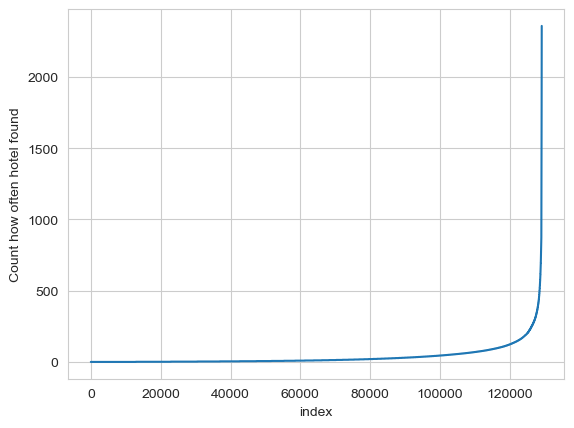

In [173]:
plt.plot(sorted_counts)
plt.xlabel("index")
plt.ylabel("Count how often hotel found")
plt.show()

In [158]:
bins = np.bincount(sorted_counts) # frequency of how often a hotel was found -> most hotels were found only 1 times

array([   1,    1,    1, ..., 2285, 2355, 2357])

In [128]:
np.sum(counts_arr) # nr of non-unique searches

4958347

In [176]:
cumulative_counts = np.cumsum(bins)
bin_index = np.searchsorted(cumulative_counts, 0.95 * sum(bins))
bin_index

156

In [190]:
bin_index/2357

0.06618582944420874

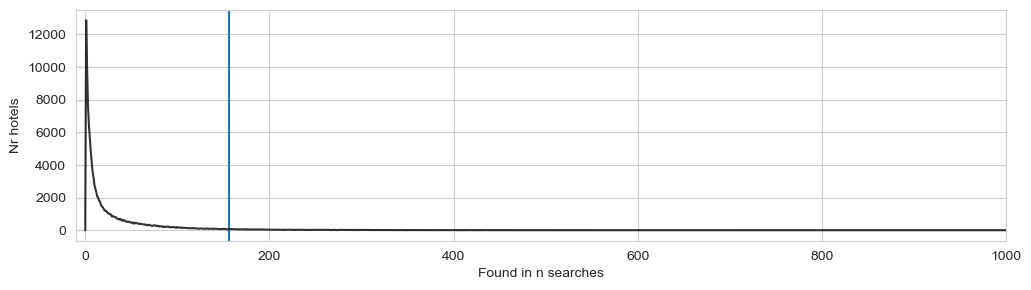

In [193]:
plt.figure(figsize=(12,3))
plt.axvline(bin_index)
plt.plot(np.bincount(counts_arr), color='black',alpha=0.8) # how many hotels there are for a bin of frequncy in search
plt.ylabel("Nr hotels")
plt.xlabel("Found in n searches")
plt.xlim((-10,1000))
plt.show()

3. ***most popular countries using the site***

In [27]:
# could have a map plot here

4. Correlation matrix

In [31]:
corr_df = df.corr(numeric_only=True).compute()

In [38]:
corr_df.fillna(0,inplace=True)
corr_df_abs = corr_df.abs()

In [ ]:

g = sns.clustermap(corr_df_abs, cmap="tab20c_r",
                   dendrogram_ratio=(0.08, .08), # left is colbar space, right is dendrogram space (proportion of h/w)
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(15*0.7, 14*0.7)) # 15,14

g.ax_row_dendrogram.remove()


g.savefig("figures/1_correl_matrix.png", dpi=300, bbox_inches="tight")

5. Expedia vs. rest
- availability 
- price

In [ ]:
rate_cols = [f"comp{i}_rate" for i in np.arange(1,9)]
inv_cols = [f"comp{i}_inv" for i in np.arange(1,9)]

c_rate = df[rate_cols].mean().compute()
c_avail = df[inv_cols].mean().compute()

In [ ]:
[f"comp{i}_inv" for i in np.arange(1,9)]

In [ ]:
# add grand average to the hotel
c_rate_m = np.append(np.array(c_rate),c_rate.mean())
c_avail_m = np.append(np.array(c_avail),c_avail.mean())
x = [str(i) for i in np.arange(1,9)]
x.append("Avg")

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15*0.7,4*0.7))
ax = plt.subplot(111)
ax.bar(x, c_rate_m, width=1, color='firebrick',alpha=0.7, label="Rate")
ax.bar(x, c_avail_m, width=1, color='blue',alpha=0.5, label="Availability")
plt.xlabel("Competitor ID")
plt.ylabel("Average Expedia advantage")
plt.ylim((-0.08,0.5))
leg = plt.legend(loc="upper right", facecolor="white", edgecolor="black")
leg.get_frame().set_alpha(1)
plt.savefig("figures/1_competitor_bar.png", dpi=300, bbox_inches="tight")

6. Average customer
- we are only considering hotels that have been booked

In [ ]:
df_f = df[df["booking_bool"]==1] 

In [ ]:
customer_cols = ["srch_room_count","srch_length_of_stay","srch_adults_count",
                 "srch_children_count","visitor_location_country_id","srch_booking_window"]
aggr_df_c = df_f[customer_cols].compute().agg(["mean","median","std",lambda x: pd.Series.mode(x)[0],"min","max"])
aggr_df_c.rename(index={"<lambda>": "mode"}, inplace=True)

In [ ]:
aggr_df_c

7. Average (booked) Hotel

In [ ]:
hotel_cols = ["prop_country_id","prop_starrating","prop_review_score","prop_brand_bool",
              "prop_location_score1","prop_location_score2", "prop_log_historical_price", "price_usd"]
aggr_df_h = df_f[hotel_cols].compute().agg(["mean","median","std",lambda x: pd.Series.mode(x)[0],"min","max"])
aggr_df_h.rename(index={"<lambda>": "mode"}, inplace=True)

In [ ]:
aggr_df_h